In [2]:
print("hello world")

hello world


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline


Data Preprocessing
Preparing x and Y

In [4]:
train = pd.read_csv('/content/drive/MyDrive/players_images/players.csv')
train.head()

,Unnamed: 0,image,player
0,0,eda97f557b.jpg,virat_kohli
1,1,273ed0f2b9.jpg,hardik_pandya
2,2,77076b6409.jpg,jasprit_bumrah
3,3,f028e2dcf8.jpg,mohammed_shami
4,4,3364f861e1.jpg,kedar_jadhav


In [7]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('/content/drive/MyDrive/players_images/train/'+train['image'][i],target_size=(250,250,3))
    #resized_img = cv2.resize(img,(250,250))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 576/576 [03:19<00:00,  2.88it/s]


In [8]:
dict = {"bhuvneshwar_kumar":0 ,
        "dinesh_karthik":1 ,
        "hardik_pandya":2 ,
        "jasprit_bumrah":3 ,
        "kedar_jadhav":4,
        "k._l._rahul":5,
         "kuldeep_yadav":6,
         "mohammed_shami":7,
         "ms_dhoni":8, 
        "ravindra_jadeja":9 , 
        "rohit_sharma":10,
         "shikhar_dhawan":11,
         "vijay_shankar":12,
         "virat_kohli":13,
         "yuzvendra_chahal":14 }

In [9]:
X.shape

(576, 250, 250, 3)

In [22]:
X[0]

array([[[0.72156864, 0.72156864, 0.6901961 ],
        [0.8666667 , 0.85882354, 0.8117647 ],
        [0.8784314 , 0.8509804 , 0.827451  ],
        ...,
        [0.01176471, 0.01176471, 0.00392157],
        [0.01176471, 0.01176471, 0.00392157],
        [0.        , 0.        , 0.        ]],

       [[0.8627451 , 0.8509804 , 0.8235294 ],
        [0.90588236, 0.8980392 , 0.8509804 ],
        [0.85882354, 0.8392157 , 0.8156863 ],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.01176471, 0.01176471, 0.01176471],
        [0.        , 0.        , 0.        ]],

       [[0.77254903, 0.7529412 , 0.7294118 ],
        [0.9137255 , 0.8980392 , 0.85490197],
        [0.9019608 , 0.8901961 , 0.8627451 ],
        ...,
        [0.01568628, 0.01568628, 0.02352941],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314]],

       ...,

       [[0.16470589, 0.20392157, 0.2       ],
        [0.1764706 , 0.22745098, 0.2       ],
        [0.1254902 , 0

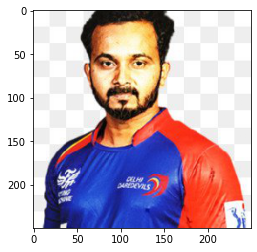

In [11]:
plt.imshow(X[100])

In [13]:
train['player_cnt'] = train['player'].map(dict) 
train.head()

,Unnamed: 0,image,player,player_cnt
0,0,eda97f557b.jpg,virat_kohli,13
1,1,273ed0f2b9.jpg,hardik_pandya,2
2,2,77076b6409.jpg,jasprit_bumrah,3
3,3,f028e2dcf8.jpg,mohammed_shami,7
4,4,3364f861e1.jpg,kedar_jadhav,4


In [14]:
y = np.array(train['player_cnt'])
y[:5]

array([13,  2,  3,  7,  4])

In [15]:
y.shape

(576,)

Preparing train and test data


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)


In [17]:
X_train.shape

(460, 250, 250, 3)

In [18]:
X_test.shape

(116, 250, 250, 3)

In [19]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


Building CNN model

In [20]:
num_classes = 15

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
15/15 [==============================] - 32s 98ms/step - loss: 3.2247 - accuracy: 0.0751
Epoch 2/20
15/15 [==============================] - 1s 71ms/step - loss: 2.6720 - accuracy: 0.1370
Epoch 3/20
15/15 [==============================] - 1s 73ms/step - loss: 2.5301 - accuracy: 0.2025
Epoch 4/20
15/15 [==============================] - 1s 69ms/step - loss: 1.9213 - accuracy: 0.4924
Epoch 5/20
15/15 [==============================] - 1s 69ms/step - loss: 1.2133 - accuracy: 0.7078
Epoch 6/20
15/15 [==============================] - 1s 70ms/step - loss: 0.5134 - accuracy: 0.9011
Epoch 7/20
15/15 [==============================] - 1s 72ms/step - loss: 0.1915 - accuracy: 0.9437
Epoch 8/20
15/15 [==============================] - 1s 70ms/step - loss: 0.1232 - accuracy: 0.9785
Epoch 9/20
15/15 [==============================] - 1s 77ms/step - loss: 0.0404 - accuracy: 0.9959
Epoch 10/20
15/15 [==============================] - 1s 77ms/step - loss: 0.0212 - accuracy: 0.9996
Epoch 11

In [21]:
model.evaluate(X_test,y_test)


4/4 [==============================] - 1s 132ms/step - loss: 5.5408 - accuracy: 0.4310


[5.5407915115356445, 0.43103447556495667]

Model accuracy on train data = 99%
  on test data = 43%

# Using Data Augmentation


In [25]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(250, 
                                                              250,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

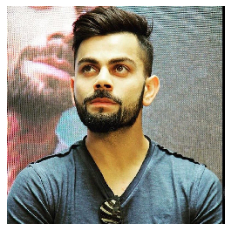

In [26]:
plt.axis('off')
plt.imshow(X[0])

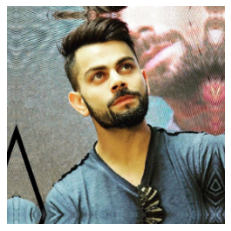

In [27]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0])

In [30]:
num_classes = 15

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train, y_train, epochs=40)


Epoch 1/40
15/15 [==============================] - 2s 87ms/step - loss: 3.4473 - accuracy: 0.0872
Epoch 2/40
15/15 [==============================] - 1s 80ms/step - loss: 2.7006 - accuracy: 0.0869
Epoch 3/40
15/15 [==============================] - 1s 80ms/step - loss: 2.6496 - accuracy: 0.1334
Epoch 4/40
15/15 [==============================] - 1s 79ms/step - loss: 2.5986 - accuracy: 0.1292
Epoch 5/40
15/15 [==============================] - 1s 80ms/step - loss: 2.5271 - accuracy: 0.1628
Epoch 6/40
15/15 [==============================] - 1s 80ms/step - loss: 2.4492 - accuracy: 0.1996
Epoch 7/40
15/15 [==============================] - 1s 80ms/step - loss: 2.3989 - accuracy: 0.2134
Epoch 8/40
15/15 [==============================] - 1s 80ms/step - loss: 2.2933 - accuracy: 0.2411
Epoch 9/40
15/15 [==============================] - 1s 79ms/step - loss: 2.1350 - accuracy: 0.3149
Epoch 10/40
15/15 [==============================] - 1s 80ms/step - loss: 2.0656 - accuracy: 0.3018
Epoch 11/

In [31]:
model.evaluate(X_test,y_test)


4/4 [==============================] - 0s 36ms/step - loss: 4.5208 - accuracy: 0.3707


[4.520776271820068, 0.37068966031074524]

Accuracy on train data is about 90% and on test data it is 37%, when we are using data augmentation.


# Using Keras Tuner

In [32]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 4.8MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=2efa7c50e9601c5773c4eec9428313d685f992ede554a8fb78a05526f8e27b1c
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=e98a82048369611d6423d00075a1ea8c28a0ac1ad3965271b6b02dc08b5d04cf
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [33]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [34]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=64, step=8),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(250,250,3)
    ),
    layers.MaxPooling2D(),

    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=12, max_value=128, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(15, activation='softmax')

  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [35]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [36]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="players_data")

In [37]:
tuner_search.search(X_train,y_train,epochs=5,validation_split=0.2)

Trial 5 Complete [00h 00m 33s]
val_accuracy: 0.1304347813129425

Best val_accuracy So Far: 0.46739131212234497
Total elapsed time: 00h 05m 21s
INFO:tensorflow:Oracle triggered exit


In [38]:
model = tuner_search.get_best_models(num_models=1)[0]

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 40)      1120      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 40)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 108)     108108    
_________________________________________________________________
flatten (Flatten)            (None, 1555200)           0         
_________________________________________________________________
dense (Dense)                (None, 80)                124416080 
_________________________________________________________________
dense_1 (Dense)              (None, 15)                1215      
Total params: 124,526,523
Trainable params: 124,526,523
Non-trainable params: 0
__________________________________________

In [40]:
model.fit(X_train,y_train ,epochs=10 , validation_split=0.2,initial_epoch=5 )

Epoch 6/10
12/12 [==============================] - 5s 356ms/step - loss: 0.1184 - accuracy: 0.9889 - val_loss: 2.7743 - val_accuracy: 0.4130
Epoch 7/10
12/12 [==============================] - 4s 336ms/step - loss: 0.0415 - accuracy: 0.9929 - val_loss: 3.6329 - val_accuracy: 0.4457
Epoch 8/10
12/12 [==============================] - 4s 337ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 3.1273 - val_accuracy: 0.4457
Epoch 9/10
12/12 [==============================] - 4s 335ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 3.0897 - val_accuracy: 0.4348
Epoch 10/10
12/12 [==============================] - 4s 334ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 3.0818 - val_accuracy: 0.4348


In [41]:
model.evaluate(X_test , y_test)

4/4 [==============================] - 1s 424ms/step - loss: 3.7768 - accuracy: 0.3966


[3.7768187522888184, 0.3965517282485962]

In [42]:
y_pred = model.predict(X_test)
y_pred[0]

array([1.79272951e-13, 3.95711512e-22, 1.49279316e-17, 1.17581694e-10,
       4.40125540e-11, 1.33802844e-18, 1.32988425e-14, 1.19245220e-19,
       4.19844076e-19, 2.73689237e-14, 1.00000000e+00, 4.81843693e-21,
       2.54327267e-13, 1.54940131e-14, 1.01625988e-14], dtype=float32)

In [43]:
y_pred = [np.argmax(element) for element in y_pred]

In [44]:
from sklearn import metrics
import numpy as np


In [45]:
print(metrics.classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.22      0.29      0.25         7
           1       0.57      0.67      0.62         6
           2       0.29      0.40      0.33         5
           3       0.00      0.00      0.00         5
           4       1.00      0.57      0.73         7
           5       1.00      0.08      0.15        12
           6       0.40      0.67      0.50        12
           7       0.50      0.50      0.50         4
           8       0.36      0.57      0.44         7
           9       0.62      0.45      0.53        11
          10       0.33      0.33      0.33         6
          11       0.57      0.29      0.38        14
          12       0.38      0.23      0.29        13
          13       0.20      0.67      0.31         3
          14       0.30      0.75      0.43         4

    accuracy                           0.40       116
   macro avg       0.45      0.43      0.39       116
weighted avg       0.50   

when we are using keras tuner, the accuracy on train data is 91% and accuracy of best model on test data is 40%

# Then at last I have used the technique Transfer learning.
